# DBSCAN

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.colors as mpcolors

### Read data and remove nulls


In [3]:
football_data = pd.read_csv("../football_data.csv", index_col=False)
football_data.fillna(method ='ffill', inplace = True)
football_data = football_data.select_dtypes(include=np.number)
football_data = football_data.drop(['Unnamed: 0', 'ID'], axis = 1)

### Scale and normalize data for easier processing

In [4]:
scaler = StandardScaler()
football_data = scaler.fit_transform(football_data)
football_data = pd.DataFrame(normalize(football_data))

pca = PCA(n_components = 2)
data2d = pca.fit_transform(football_data)
data2d = pd.DataFrame(data2d)
data2d.columns = ['D1', 'D2']


### Finding best value for epsilon

- We find the optimal epsilon value by plotting a k-distance graph. 
- This involves finding the nearest neighbor for each data point and calculating the distance between those points, using the sklearn neighbors library.
- These distances are sorted and plotted to find the best epsilon value.

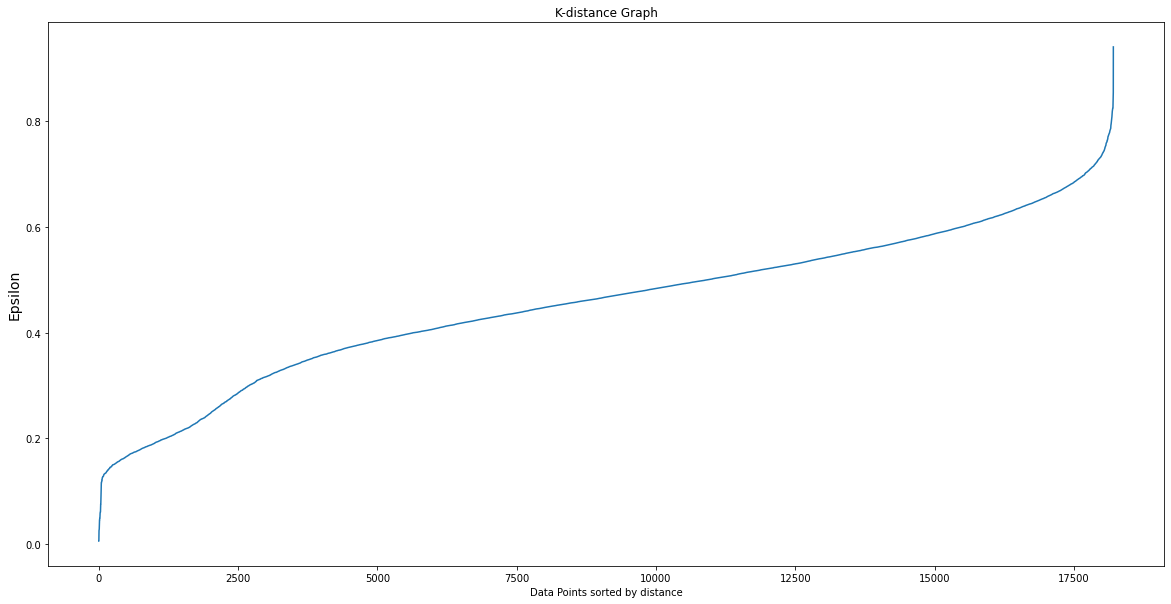

In [6]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(football_data)
distances, indices = nbrs.kneighbors(football_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### Potential epsilon values = 0.734, 0.235, 0.14

### Applying DBSCAN with various epsilon and min_samples values

- After obtaining the epsilon value, we plot graphs with various values of min_samples.
- Since we have roughly 47 features and 18000+ data points, we start with a value of 50, and keep increasing it to achieve the optimum number.
- Since 50 only yields 2 clusters, we gradually increase it until we get 3 clusters at 500, and 4 at 1000.
- From k means, we understood that 4 is the optimum number of clusters. Therefore we start fine tuning around 1000 to get the correct value.
- The diagrams are similar for ranges from 850 - 1100 so we choose 1000 as min_samples.

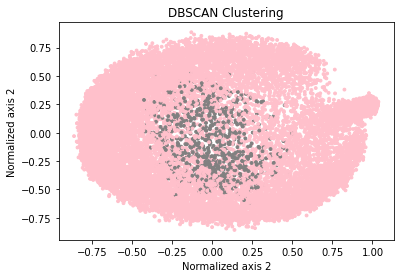

In [39]:
dbscan = DBSCAN(eps = 0.734, min_samples = 50)
dbscan.fit(football_data)

data2d['DBSCAN_labels'] = dbscan.labels_ 

colors=['grey', 'purple', 'red', 'blue', 'green', 'yellow', 'orange', 'pink']

plt.scatter(data2d['D1'],data2d['D2'],c = data2d['DBSCAN_labels'], cmap = mpcolors.ListedColormap(colors),s = 8)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized axis 2')
plt.ylabel('Normalized axis 2')
plt.show()

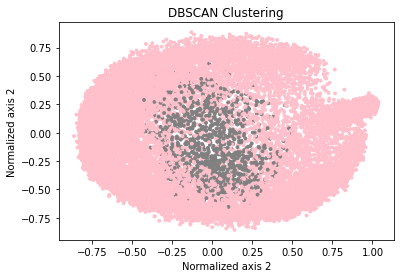

In [9]:
dbscan = DBSCAN(eps = 0.734, min_samples = 100)
dbscan.fit(football_data)

data2d['DBSCAN_labels'] = dbscan.labels_ 

colors=['grey', 'purple', 'red', 'blue', 'green', 'yellow', 'orange', 'pink']

plt.scatter(data2d['D1'],data2d['D2'],c = data2d['DBSCAN_labels'], cmap = mpcolors.ListedColormap(colors),s = 8)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized axis 2')
plt.ylabel('Normalized axis 2')
plt.show()

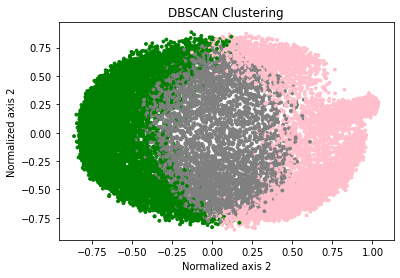

In [10]:
dbscan = DBSCAN(eps = 0.734, min_samples = 500)
dbscan.fit(football_data)

data2d['DBSCAN_labels'] = dbscan.labels_ 

colors=['grey', 'purple', 'red', 'blue', 'green', 'yellow', 'orange', 'pink']

plt.scatter(data2d['D1'],data2d['D2'],c = data2d['DBSCAN_labels'], cmap = mpcolors.ListedColormap(colors),s = 8)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized axis 2')
plt.ylabel('Normalized axis 2')
plt.show()

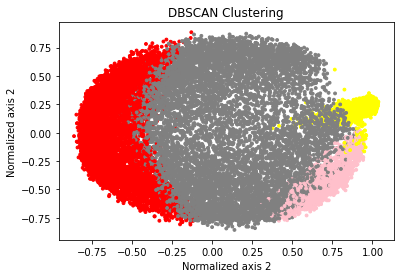

In [11]:
dbscan = DBSCAN(eps = 0.734, min_samples = 1000)
dbscan.fit(football_data)

data2d['DBSCAN_labels'] = dbscan.labels_ 

colors=['grey', 'purple', 'red', 'blue', 'green', 'yellow', 'orange', 'pink']

plt.scatter(data2d['D1'],data2d['D2'],c = data2d['DBSCAN_labels'], cmap = mpcolors.ListedColormap(colors),s = 8)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized axis 2')
plt.ylabel('Normalized axis 2')
plt.show()

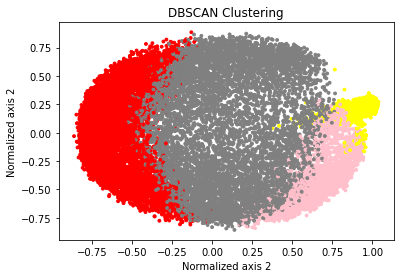

In [31]:
dbscan = DBSCAN(eps = 0.734, min_samples = 850)
dbscan.fit(football_data)

data2d['DBSCAN_labels'] = dbscan.labels_ 

colors=['grey', 'purple', 'red', 'blue', 'green', 'yellow', 'orange', 'pink']

plt.scatter(data2d['D1'],data2d['D2'],c = data2d['DBSCAN_labels'], cmap = mpcolors.ListedColormap(colors),s = 8)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized axis 2')
plt.ylabel('Normalized axis 2')
plt.show()

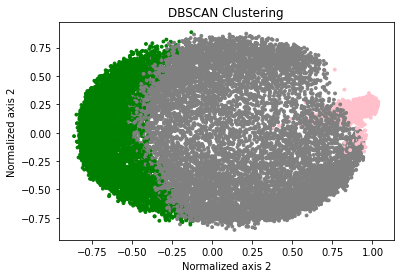

In [15]:
dbscan = DBSCAN(eps = 0.734, min_samples = 1100)
dbscan.fit(football_data)

data2d['DBSCAN_labels'] = dbscan.labels_ 

colors=['grey', 'purple', 'red', 'blue', 'green', 'yellow', 'orange', 'pink']

plt.scatter(data2d['D1'],data2d['D2'],c = data2d['DBSCAN_labels'], cmap = mpcolors.ListedColormap(colors),s = 8)
plt.title('DBSCAN Clustering')
plt.xlabel('Normalized axis 2')
plt.ylabel('Normalized axis 2')
plt.show()